# Modelling of Cognitive Processes
## Delta learning 
---
Lesson 08   
12/11/2019   
Pieter Huycke   

# Overview

## Theoretical
- $scikit-learn?$

## Practical
1. Florence + the machine: novice
2. The iris dataset: journeyman
3. The iris dataset: adept
4. The digits dataset: expert

# Theory

## What?

Let's take a look at the documentation the developers wrote for $scikit-learn$ ⬇️

In [1]:
import sklearn

print(sklearn.__doc__)


Machine learning module for Python

sklearn is a Python module integrating classical machine
learning algorithms in the tightly-knit world of scientific Python
packages (numpy, scipy, matplotlib).

It aims to provide simple and efficient solutions to learning problems
that are accessible to everybody and reusable in various contexts:
machine-learning as a versatile tool for science and engineering.

See http://scikit-learn.org for complete documentation.



## Why?

<font color='green'>Advantages</font>
* One can use $scikit-learn$ for modelling purposes, as we will be doing in a moment
    * $scikit-learn$ was originally built for machine learning efforts though
* It can be used for larger scale problems (e.g. process large amounts of input to the model)   
* As it is a well-known package in (computational) science, knowledge of this package is a valuable skill to have

<font color='red'>Disadvantages</font>
* Sometimes $scikit-learn$ operates like a black box
* The functions are predefined, so you might not find what you are looking for exactly

## How?

You can install $scikit-learn$ in your Anaconda environment using the following steps:
1. Check if $scikit-learn$ is already installed by executing the following in your __Spyder console__
```python
import sklearn
```
2. If this throws no errors, you can stop reading
3. If you are here, this means that you should close spyder, and open an __Anaconda prompt__
4. In the prompt, type the following:
```bash
conda install -c anaconda scikit-learn
```   
5. Now type
```bash
spyder
```
6. In the new instance of Spyder, try _step 2_ and _step 3_ again

<font color='red'>If this did not work out for you, raise your hand and ask for help</font>

# Practical

## A single slide on organizational matters

1. At the end of exercises 1 and 2, some additional exercises are defined.   
   These are meant as <font color='indigo'>homework assignments</font>, and will therefore not be considered during this practical session.
2. In the next MCP test, we will ask you to program more than you did in test 2.   
   You can prepare yourself adequately by completing the exercises in the practicals and the homeworks.

# 1. Florence + the machine: novice

## Florence: the recap

Quick recap of the previous practical session:
- We had two patterns we wanted to associated with each other using Delta learning
    - We had a pattern which represented an image of florence + the machine
        - ```image_florence = [.99, .01, .99, .01, .99, .01]```
    - Additionally, we had a pattern which represented an song of the same group
        - ```song_stand_by_me = [.99, .99, .01, .01]```
- To perform the Delta learning, we used custom-made code
- <font color='green'>We succeeded to learn the association between the two patterns using Delta learning</font>

## Making the old code work

Now, we will adapt and extend the code from the previous practical and use $scikit-learn$ to perform learning.   
Below, we define a list of adaptations that has to be completed to make sure the code from the previous practical works using $scikit-learn$

## Adaptations to be done

1. The output should be a 1D array, so we should work with integer values as output (i.e. ```group_1 = 0```).   
   Mind that if you would check the dimensionality of a 1D array (```arr.shape```), your output would be: ```(x,)```.
2. Note that $scikit-learn$ works best with NumPy arrays.   
   So, the variables ```image_1``` and ```group_1``` should be converted to NumPy arrays.
3. The input should be an $N \times P$ array.   
   Here, $N$ represents how many times the pattern is shown to the model.   
   In contrast, $P$ is the length of the pattern.   
    - So, if we showed the image 50 times, this would result in an array with dimensions $50 \times 6$.

## Extensions to be done

1. Because ```scikit-learn``` works only when instances from several __different__ classes are offered, we will add another group image, and their associated label.
    - Add a variabel refering to the image of your favorite group:   
    ```image_2 = np.array([.01, .99, .01, .99, .01, .99])```
2. Add a label associated with this new group: ```group_2 = 1```.
3. We will use $N = 50$, meaning that we will show each image 50 times to the model.
4. Link the associated label with each image, meaning that the model should react $0$ if the image of florence is shown, and $1$ if the image of the other group is presented.
5. Comply with the needed array notation defined in _steps 2 & 3_ from the _Adaptations_ list.
6. Find a way to shuffle the input array and the output array **together**.
7. Use 75% of the input array to train your model, and test performance on the other 25%.

## Florence: the modelling aproach

Our action plan:

1. Open **'ch4_florence_sklearn_exercise.py'**
2. Fill in the blanks using the aforementioned explanation and the comments
   - Mind that _how_ you fill in the blanks does not matter, **what matters is that it works...**
3. Stuck? <font color='blue'>G</font><font color='red'>o</font><font color='yellow'>o</font><font color='blue'>g</font><font color='green'>l</font><font color='red'>e</font> is your friend 😉
4. Really stuck? Ask us!

In [2]:
# import: general and scikit-learn specific
import numpy              as np

from sklearn.linear_model import Perceptron
from sklearn.metrics      import accuracy_score

# define the patterns we need to associate
image_florence   = np.array([.99, .01, .99, .01, .99, .01])
song_florence    = 1

image_bfmv       = np.array([.01, .99, .01, .99, .01, .99])
song_bfmv        = 0

# link patterns together in large array
images           = np.vstack((image_florence, image_bfmv))
songs            = np.vstack((song_florence, song_bfmv))

n                = 50
image_array      = np.repeat(images, 
                             n, 
                             axis = 0)
song_array       = np.ravel(np.repeat(songs, 
                                      n, 
                                      axis = 0))

In [3]:
# shuffle arrays together
indx = np.arange(image_array.shape[0])
np.random.shuffle(indx)

image_array = image_array[indx]
song_array  = song_array[indx]

In [4]:
# split the data in the training proportion and the test proportion
X_train, y_train, X_test, y_test = image_array[:75,:], song_array[:75], \
                                   image_array[75:,:], song_array[75:]

# define classifier (Perceptron object from scikit-learn)
classification_algorithm = Perceptron(max_iter         = 100,
                                      tol              = 1e-3,
                                      verbose          = 0,
                                      random_state     = 2019,
                                      n_iter_no_change = 5)

# fit ('train') classifier to the training data
classification_algorithm.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=2019, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [5]:
# predict y based on x for the test data
y_pred = classification_algorithm.predict(X_test)

# print accuracy using a built-in sklearn function
print('Accuracy percentage: {0:.2f}'.format(accuracy_score(y_test, y_pred) * 100))

Accuracy percentage: 100.00


## <font color='indigo'>Homework assignment</font>

Play around with the model, and check out how changing the parameters changes the model's performance

* Add normally distributed noise
* Let the model train more and less on the inputted patterns
* Let the input patterns resemble each other more and less

# 2. The iris dataset: journeyman

## Iris dataset?

In this exercise, we will use the iris dataset [(Fisher, 1936)](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1469-1809.1936.tb02137.x).   
More specifically, we will use this dataset to **predict the species** of the flower **based on the features** of the flower.
   
The dataset consists of 150 rows, where each row represents measurements of 150 different flowers.   
Each flower is different, but they all belong to the same family: "iris".   
There are 3 different species in the dataset, so we have 50 different flowers for each family.

**The data available** 🌹  
* Features of the flower
    * Sepal width
    * Sepal length
    * Petal width
    * Petal length
* The name of the flower
    * Iris setosa    
    * Iris versicolor
    * Iris virginica

## An example of the provided features

![iris features](./iris.jpg)

**Our question**   
What iris _type (setosa, virginica or versicolor?)_ is this based on the provided measures?

In [6]:
# import modules
import pandas  as     pd
from   sklearn import datasets

# import the Iris flower dataset
iris        = datasets.load_iris()
X           = iris.data
y           = iris.target
class_names = iris.target_names

# glue data together
y           = np.reshape(y, 
                         (150, 1)) 
data_shown  = np.concatenate((X, y), 
                             axis = 1)
iris_visual = pd.DataFrame(data_shown)

# make column names
colnames            = ['sep len', 'sep wid', 
                       'pet len', 'pet wid',
                       'family']
iris_visual.columns = colnames

In [7]:
# show me the way (first 10 rows)
print('First 5 observations:\n', iris_visual[:5])
print('\nLast 5 observations:\n',iris_visual[-5:])

First 5 observations:
    sep len  sep wid  pet len  pet wid  family
0      5.1      3.5      1.4      0.2     0.0
1      4.9      3.0      1.4      0.2     0.0
2      4.7      3.2      1.3      0.2     0.0
3      4.6      3.1      1.5      0.2     0.0
4      5.0      3.6      1.4      0.2     0.0

Last 5 observations:
      sep len  sep wid  pet len  pet wid  family
145      6.7      3.0      5.2      2.3     2.0
146      6.3      2.5      5.0      1.9     2.0
147      6.5      3.0      5.2      2.0     2.0
148      6.2      3.4      5.4      2.3     2.0
149      5.9      3.0      5.1      1.8     2.0


## ...?

Our goal is to predict the family based on the provided features.   
So, if we see the following:

```python
In [9]: X[10,:]
Out[9]: array([5.4, 3.7, 1.5, 0.2])

In [10]:y[10]
Out[10]: 0
```

We know that flower 11 has a sepal length of 5.4 cm, sepal width of 3.7 cm ... .   
We also know that flower 11 belongs to family 0 (i.e. setosa).

Ideally, our model would be able to predict the family based on the features for every flower.   
So, if we give the model the features for flower 62:

```python
In [16]: X[61,:]
Out[16]: array([5.9, 3. , 4.2, 1.5])
```

we want to output of the model to be equal to 1 (i.e. versicolor), which is the observed family for flower 62.

## The modelling perspective

So, why the iris dataset?   
When doing computational modelling, we might be interested in the processes behind object recognition.   
In that case, we might train a model that is able to recognize flowers based on certain flower characteristics.   
Additionally, we might even go further, and model how someone becomes an expert in recognizing flowers, what happens when we presents other objects to a flower expert ...   

Now that the reason we use the iris dataset is (hopefully) clear, we move on to the actual exercise.

## The iris dataset: journeyman

<ins>Problem statement</ins>  

Your task is to implement an algorithm in Python that is able to successfully separate flowers belonging to the __setosa__ and __virginica__ family, and to find out whether this task is linearly separable or not.   
For now, we will use the entire Iris dataset, but we ask you to relabel the observations belonging to the 'versicolor' family to 'virginica'.   

In line with the previous exercise, you should train your model on part of the data, and after training test the model on the rest of the data (extra: look for a built-in function in $scikit-learn$ that is able to shuffle and split the data in a training - and a testing part).   

Print your classification accuracy at the end of your script, and infer based on your results whether your algorithm succeeded or not.

In [8]:
# import: general and scikit-learn specific
import numpy                 as np

from sklearn                 import datasets
from sklearn.linear_model    import Perceptron
from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

In [9]:
# import the Iris flower dataset
iris        = datasets.load_iris()
X           = iris.data
y           = iris.target

# binarize the data: we relabel 1 to 2
   # thus, the flower is either class 0 or class 2
y[np.where(y == 1)] = 2

# split data in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state = 2019)

In [10]:
# define classifier (Perceptron object from scikit-learn)
classification_algorithm = Perceptron(max_iter         = 100,
                                      tol              = 1e-3,
                                      verbose          = 0,
                                      random_state     = 2019,
                                      n_iter_no_change = 5)

# fit ('train') classifier to the training data
classification_algorithm.fit(X_train, y_train)

# predict y based on x for the test data
y_pred = classification_algorithm.predict(X_test)

In [11]:
# select wrong predictions (absolute vals) and print them
compared       = np.array(y_pred == y_test)
absolute_wrong = (compared).sum()
print("Our classification was wrong for {0} out of the {1} cases.".format(absolute_wrong, 
                                                                          len(compared)))


# print accuracy using dedicated function
print('Accuracy percentage: {0:.2f}'.format(accuracy_score(y_test, y_pred) * 100))

Our classification was wrong for 38 out of the 38 cases.
Accuracy percentage: 100.00


## <font color='indigo'>Homework assignment</font>

<ins>Problem statement</ins>  

Check which **flower features** are linearly separable, and which ones are not.   
Loop over each possible pair of features (sepal length + sepal width, sepal length + petal length ...) and determine whether this pair is linearly separable or not. 

Print your findings at the end of your script.

# The iris dataset: adept

## The iris dataset: adept

Note: no start script is provided as this script relies partly on the code from previous exercises.

<ins>Problem statement</ins>  

As we already saw in the theoretical part about delta learning, this learning algorithm only works when the provided inputs are linearly separable. For this assignment, we ask you to find out which flower families are linearly separable. Thus, can a delta learning algorithm separate setosa from virginica, or setosa from versicolor...?   

Write a script that loops over each family comparison 50 times to account for variability in data shuffling and data splitting. Compute the minimal accuracy across simulations for each family comparison, and determine based on this which flower families are linearly separable, and which ones are not.

The desired output should be of the form $50 \times 3$, where $50$ represents the amount of simulations, and $3$ represents the amount of category comparisons that are made.

In [12]:
# import: general and scikit-learn specific
import itertools
import numpy                 as np
import pandas                as pd

from sklearn                 import datasets
from sklearn.linear_model    import Perceptron
from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

In [13]:
# import the iris flower dataset
iris = datasets.load_iris()
X    = iris.data
y    = iris.target

In [14]:
# define where to store the simulation results
arr = np.zeros((50, 3))

# find all permutations
permutations = list(itertools.combinations('012', 2))

# 50 simulations for each comparison
for i in range(50):
    for perm in permutations:
        
        # apply boolean mask to get the values we need from the array
        first_class, second_class = int(perm[0]), int(perm[1])
        mask    = np.where((y == first_class) | (y == second_class))
        X_selec = X[mask]
        y_selec = y[mask]
    
        # split data in training and testing set
        X_train, X_test, y_train, y_test = train_test_split(X_selec, 
                                                            y_selec)
        
        # classifier
        classification_algorithm = Perceptron(max_iter         = 100,
                                              tol              = 1e-3,
                                              verbose          = 0,
                                              n_iter_no_change = 5)
        
        # fit ('train') classifier to the training data
        classification_algorithm.fit(X_train, y_train)
        
        # predict y based on x for the test data
        y_pred = classification_algorithm.predict(X_test)
        
        # link the names of the families to the int label
        name_dict = {0: 'setosa',
                     1: 'versicolor',
                     2: 'virginica'}
        
        # store the accuracy in the pandas DataFrame
        arr[i, permutations.index(perm)] = accuracy_score(y_test, y_pred) * 100

In [15]:
# results of the simulation    
simulation_results         = pd.DataFrame(arr)
colnames                   = ['Set - Vers', 'Set - Virg', 'Vers - Virg']
simulation_results.columns = colnames

print('Mininum accuracy of Setosa vs Versicolor: {} %'.format(np.min(simulation_results['Set - Vers'])))
print('Mininum accuracy of Setosa vs Virginica: {} %'.format(np.min(simulation_results['Set - Virg'])))
print('Mininum accuracy of Versicolor vs Virginica: {} %'.format(np.min(simulation_results['Vers - Virg'])))

Mininum accuracy of Setosa vs Versicolor: 96.0 %
Mininum accuracy of Setosa vs Virginica: 100.0 %
Mininum accuracy of Versicolor vs Virginica: 36.0 %


# The digits dataset: expert

## The digits dataset

This dataset is made up of 1797 $8 \times 8$ images.   
Each image, like the one shown below (representing number 1), is of a hand-written digit.   
The dataset is included in ```sklearn.datasets```.   
Additional information can be found on [this webpage](https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits).

![Digit example](./digit_1.jpg)

## The digits dataset

We can see that this array $1797 \times 8 \times 8$ represents 1797 images, each image being a square of $8 \times 8$ representing pixel values.   
Here, larger values represent darker pixels, so:
- ```image[0, 0, 0] == 0.0```  ➡️ this pixel will be plotted in white
- ```image[0, 4, 2] == 8.0```  ➡️ this pixel will be plotted in gray
- ```image[0, 1, 3] == 15.0``` ➡️ this pixel will be plotted in black

We illustrate this point immediately below

In [16]:
import matplotlib.pyplot as plt
import numpy             as np

from   sklearn           import datasets, svm, metrics

# load data
digits = datasets.load_digits()
X      = digits.images
y      = digits.target

Dimensions of the input data:  (1797, 8, 8)


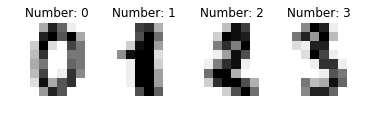

In [17]:
# showing dims
print("Dimensions of the input data: ", X.shape)

# concatenate elements row wise + select first four
images_and_labels = list(zip(X, y))
first_four        = images_and_labels[:4]

# plot the first four elements in the dataset
for index, (image, label) in enumerate(first_four):
    plt.subplot(1, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, 
               cmap          = plt.cm.gray_r, 
               interpolation = 'nearest')
    plt.title('Number: %i' % label)

## The digits dataset: expert

Note: no start script is provided as this is an expert exercise, good luck! 🤖

<ins>Problem statement</ins>  

Image processing is a valuable skill to have, so in this exercise, we ask you to load in the digits dataset available in the standard version of $scikit-learn$. Your goal is straightforward: process the images, feed them to a delta learning algorithm, and check whether you are able to let the model distinguish one number (e.g. $7$) from all the other numbers.   

Think about the logical steps that you should take to succeed in this exercise.   
What does your delta learning model need? How should the input to the model look like? 

Is classification of images a linearly separable problem or not?